In [5]:
from astropy.table import Table, Column
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm

sys.path.insert(0, '../Modules')
import erqScaling
import erqMedSpec
import os

In [6]:
# Reading data
smp=Table.read('../LumMatch/LumMatch.fits')
iW3_0 = smp['i-w3']
kt80_0= smp['kurt80_gf']
rew_0 = smp['rew_gf']
rew_0  = np.log10(rew_0)
frat_0 = smp['frat_nv/civ']
fwhm_0 = smp['fwhm_gf']
rw3_0=smp['r-w3']
rz_0=smp['r-z']
iz_0 = iW3_0 - rw3_0 + rz_0
Lum_0 = smp['Lum']
z_dr12 = smp['z_dr12']
plate = smp['Plate']
mjd = smp['MJD']
fiber =  smp['FiberID']

In [7]:
# Normalizing data + getting the center and ERQ
data_0=np.array(list(zip(iW3_0, rew_0)))
(data, minData, rangeData) =  erqScaling.MinMaxScaler(data_0)
Main_center = np.median(data, axis=0)
ERQ = data[((iW3_0>=4.6) & (rew_0>=2))]

enclosing_ratio=1; resolution=1000; ngrids=500; 
opening_angle, ERQ_direction = erqMedSpec.opening_angle_finder(ERQ, Main_center, enclosing_ratio, resolution)
#  Obtaining Point A and B for the ERQ wedge
x_erq, y_erq= np.median(ERQ, axis=0)  #center of ERQ population 
r_erq = np.sqrt((x_erq-Main_center[0])**2 + (y_erq-Main_center[1])**2)  # ERQ radius 

#  Obtaining Point A and B for the ERQ wedge
x_erq, y_erq= np.median(ERQ, axis=0)  #center of ERQ population 
r_erq = np.sqrt((x_erq-Main_center[0])**2 + (y_erq-Main_center[1])**2)  # ERQ radius 

A= [0,0]
B= [0,0]
ext=1.6
A[0] = Main_center[0] + r_erq*ext*np.cos(ERQ_direction+opening_angle)
B[0] = Main_center[0] + r_erq*ext*np.cos(ERQ_direction-opening_angle)
A[1] = Main_center[1] + r_erq*ext*np.sin(ERQ_direction+opening_angle)
B[1] = Main_center[1] + r_erq*ext*np.sin(ERQ_direction-opening_angle)
np.rad2deg(opening_angle)

bw=3 # bandwidth ratio for the default value
wdg=0
dir = 'outData/'
x_erq_0 = 4.6
y_erq_0 = 2
expansion=[1.35, 1.55, 2.2]
if os.path.exists(dir)==False:
    os.system('mkdir -p ' + dir)
levels = np.array([0.03, .1, 0.3])
# bin_label, bin_pop, tip_label = erqMedSpec.KDE_Bin2D(data, rangeData, minData, True, x_erq_0, y_erq_0,\
#                                           ngrids,  bw, levels, \
#                                           A, B, \
#                                           True,expansion,\
#                                           dir+'Bins-ratio-%.2f-bw-%.2f-wdg-%1d.png'\
#                                           %(enclosing_ratio, bw, wdg), \
#                                           True, '(i-w3-%.2f)/%.2f' %(minData[0], rangeData[0]),'(log10(rew)-%.2f)/%.2f' %(minData[1], rangeData[1]), \
#                                           None)

# np.savetxt(dir + 'bin_label-wdg-%1d' %(wdg)+'.txt', bin_label)
# np.savetxt(dir + 'bin_pop-wdg-%1d' %(wdg) +'.txt', bin_pop)
# np.savetxt(dir + 'CentralBinLabel.txt' , tip_label)

In [ ]:
#central bin  Med-Spec
# mask = (tip_label==1)
# tipSpec = erqMedSpec.stacker(z_dr12[mask], plate[mask], mjd[mask], fiber[mask]) 
# np.savetxt(dir + 'central-bin-medspec.txt', tipSpec)

# other bins MedSpec
nBin = np.int32(np.max(bin_label))
for b in range(2,nBin+1):
    mask = (bin_label==b)
    medSpec = erqMedSpec.stacker(z_dr12[mask], plate[mask], mjd[mask], fiber[mask])
    np.savetxt(dir +'med-spec-wdg-%d-bin-%d.txt' %(wdg, b-1), medSpec)

In [8]:
bw=3 # bandwidth ratio for the default value
wdg=2
# levels = np.array([0.03, .1, 0.3])

dir = 'outData/'
ext=-0.8
A= [0,0]
B= [0,0]
A[0] = Main_center[0] + r_erq*ext*np.cos(ERQ_direction+opening_angle)
B[0] = Main_center[0] + r_erq*ext*np.cos(ERQ_direction-opening_angle)
A[1] = Main_center[1] + r_erq*ext*np.sin(ERQ_direction+opening_angle)
B[1] = Main_center[1] + r_erq*ext*np.sin(ERQ_direction-opening_angle)

# dir = 'outData-cf/'
# if os.path.exists(dir)==False:
#     os.system('mkdir -p ' + dir)
# levels = np.array([0.03, .1, 0.3])
bin_label, bin_pop = erqMedSpec.KDE_Bin2D(data, rangeData, minData,False, 1, 1,\
                                          ngrids,  bw, levels, \
                                          A, B, \
                                          True,expansion,\
                                          dir+'Bins-ratio-%.2f-bw-%.2f-wdg-%1d.png'\
                                          %(enclosing_ratio, bw, wdg), \
                                          False, '(i-w3-%.2f)/%.2f' %(minData[0], rangeData[0]),'(log10(rew)-%.2f)/%.2f' %(minData[1], rangeData[1]), \
                                          None)
np.savetxt(dir + 'bin_label-wdg-%1d' %(wdg)+'.txt', bin_label)
np.savetxt(dir + 'bin_pop-wdg-%1d' %(wdg) +'.txt', bin_pop)

KDE density estimation in 2D...
Contour plot...


../Modules/erqMedSpec.py:397: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
../Modules/erqMedSpec.py:406: UserWarning: The following kwargs were not used by contour: 'c'
  c = ax.contour(xi, yi, zi.reshape(xi.shape), levels=levels, alpha=0.6, c='black')
  0%|          | 80/29072 [00:00<00:36, 799.71it/s]

hull...


  0%|          | 0/7 [00:00<?, ?it/s]/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 7/7 [00:00<00:00, 91.71it/s]
posx and posy should be finite values
posx and posy should be finite values


plotting


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


tip_pop 0


In [10]:
# other bins MedSpec
nBin = np.int32(np.max(bin_label))
for b in range(2,nBin+1):
    mask = (bin_label==b)
    medSpec = erqMedSpec.stacker(z_dr12[mask], plate[mask], mjd[mask], fiber[mask])
    np.savetxt(dir +'med-spec-wdg-%d-bin-%d.txt' %(wdg, b-1), medSpec)

100%|██████████| 280/280 [00:49<00:00,  5.65it/s]
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
100%|██████████| 2/2 [00:00<00:00,  6.64it/s]


(array([3.03971117, 3.41967507, 1.39320095, 0.3799639 , 0.3799639 ,
        0.25330926, 0.12665463, 0.        , 0.        , 0.12665463]),
 array([1.0192986 , 1.12895814, 1.23861768, 1.34827723, 1.45793677,
        1.56759631, 1.67725585, 1.78691539, 1.89657493, 2.00623447,
        2.11589402]),
 <a list of 10 Patch objects>)

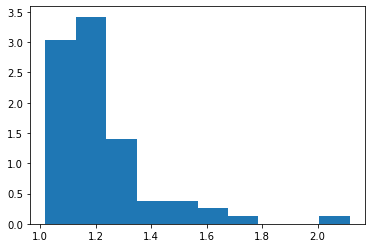

In [11]:
# LOF scores for each bin + Error
dir = 'outData/'
from sklearn.neighbors import LocalOutlierFactor as LOF


clf= LOF(n_neighbors=50,  n_jobs=8)
clf.fit_predict(data)
LOFScores= -clf.negative_outlier_factor_
# plt.hist(LOFScores, density=True)
plt.hist(LOFScores[((iW3_0>=4.6) & (rew_0>=2))], density=True)


  0%|          | 0/29072 [00:00<?, ?it/s]/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|          | 0/29072 [00:00<?, ?it/s]/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/reza/anaconda3/lib/python3.8/site-packag

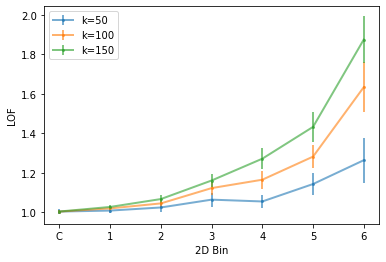

In [15]:
cc=-1
from matplotlib import cm
c = cm.get_cmap('jet',3)
wdg=0
nBin=7
for k in [50, 100, 150]:
# for k in [500, 1000, 1500, 2000]:

    clf= LOF(n_neighbors=k,  n_jobs=8)
    clf.fit_predict(data)
    LOFScores= -clf.negative_outlier_factor_
    BootSize=np.int32(len(data))
    LOFScores_boot=np.zeros([100,len(data)])
    for b in tqdm(range(100)):
        rand_ind = np.random.choice(range(len(data)), BootSize, replace=True)
        test= data[rand_ind,:]
        clf= LOF(n_neighbors=k,  n_jobs=-1)
        clf.fit_predict(test)
        LOFScores_boot[b,rand_ind] = -clf.negative_outlier_factor_
        LOFScores_boot[b,~rand_ind] = 0

    ErrLOF = np.zeros(len(data))
    MeanLOFBoot = np.zeros(len(data))
    for i in range(len(data)):

        LOF_pool = LOFScores_boot[:,i]
        ErrLOF[i] = np.std(LOF_pool[LOF_pool>=1])
        # MeanLOFBoot[i] = np.mean(LOF_pool[LOF_pool<=-1])

    LOFScoresMed=[]
    ErrLOFScoresMed=[]
    MeanLOFBootMed=[]

    bin_label = np.loadtxt(dir + 'bin_label-wdg-%1d' %(wdg)+'.txt')
    bin_pop = np.loadtxt(dir + 'bin_pop-wdg-%1d' %(wdg) +'.txt')
    tip_label = np.loadtxt(dir + 'CentralBinLabel.txt')
    tip_pop= np.sum(tip_label)

    #  Median properties in each bin
    for b in range(1,nBin+1):
        if(b>1):
            mask = (bin_label==b)

        else:
            mask = (tip_label==1)

        LOFScoresMed.append(np.median(LOFScores[mask]))
        ErrLOFScoresMed.append(np.nanmedian(ErrLOF[mask]))
        MeanLOFBootMed.append(np.median(MeanLOFBoot[mask]))


    # plt.plot(['C', '1', '2', '3', '4', '5', '6'], LOFScoresMed[0:nBin], marker='o', lw=2, alpha=0.6, c='C0')
    plt.errorbar(['C', '1', '2', '3', '4', '5', '6'], LOFScoresMed[0:nBin], yerr=ErrLOFScoresMed[0:nBin], marker='o', lw=2,
                 markersize=2, alpha =0.6, label='k=%d'%k)

plt.legend()
plt.xlabel('2D Bin')
plt.ylabel('LOF')
# plt.title('K=%d'%k)
plt.savefig(dir+'2d-LOF.png', dpi=200, format='png')
plt.show()

In [16]:
dir = 'outData/'

for wdg in [0,2]:
    bin_label = np.loadtxt(dir + 'bin_label-wdg-%1d' %(wdg)+'.txt')
    bin_pop = np.loadtxt(dir + 'bin_pop-wdg-%1d' %(wdg) +'.txt')
    tip_label = np.loadtxt(dir + 'CentralBinLabel.txt')
    tip_pop= np.sum(tip_label)
    
    #  Median properties in each bin


    imw3_bin_med =[]
    REW_bin_med = []
    fwhm_bin_med = []
    kt80_bin_med = []
    frat_bin_med = []
    iz_bin_med = []
    Lum_bin_med = []
    BinPop=[]
    LOFScoresMed=[]
    
    for b in range(1,nBin+1):
        if(b>1):
            mask = (bin_label==b)
            BinPop.append(bin_pop[b-1])

        else:
            mask = (tip_label==1)
            BinPop.append(tip_pop)


        imw3_bin_med.append(np.median(iW3_0[mask]))
        REW_bin_med.append(np.median(rew_0[mask]))
        fwhm_bin_med.append(np.median(fwhm_0[mask]))
        kt80_bin_med.append(np.median(kt80_0[mask]))
        frat_bin_med.append(np.median(frat_0[mask]))
        iz_bin_med.append(np.median(iz_0[mask]))
        Lum_bin_med.append(np.median(Lum_0[mask]))
        LOFScoresMed.append(np.median(LOFScores[mask]))

    tabProperties = Table([BinPop, imw3_bin_med, REW_bin_med, fwhm_bin_med, kt80_bin_med, frat_bin_med, iz_bin_med, Lum_bin_med, LOFScoresMed],
                          
                          names=('nBin', 'iw3', 'rew', 'fwhm', 'kt80', 'frat', 'iz', 'Lum', 'LOF'))
    if os.path.exists(dir+ '/wdg-%d-Properties.fits' %(wdg)):
        os.system('rm '+ dir+'/wdg-%d-Properties.fits' %(wdg))
    tabProperties.write(dir+ '/wdg-%d-Properties.fits' %(wdg), format='fits')

#  one table for all wedges
imw3_bin_med =[]
REW_bin_med = []
fwhm_bin_med = []
kt80_bin_med = []
frat_bin_med = []
iz_bin_med = []
Lum_bin_med = []
BinPop=[]
Wedge=[]
binNo=[]
LOFScoresMed=[]
ErrLOFScoresMed=[]
for wdg in [0,2]:
    bin_label = np.loadtxt(dir + 'bin_label-wdg-%1d' %(wdg)+'.txt')
    bin_pop = np.loadtxt(dir + 'bin_pop-wdg-%1d' %(wdg) +'.txt')
    tip_label = np.loadtxt(dir + 'CentralBinLabel.txt')
    tip_pop= np.sum(tip_label)
    from line_db import line_db
    from matplotlib import cm
    from scipy import ndimage

    
    #  Median properties in each bin
    for b in range(1,nBin+1):
        if(b>1):
            mask = (bin_label==b)
            BinPop.append("{0:.0f}".format(bin_pop[b-1]))

        else:
            mask = (tip_label==1)
            BinPop.append("{0:.0f}".format(tip_pop))

        
        imw3_bin_med.append("{0:.2f}".format(np.median(iW3_0[mask])))
        REW_bin_med.append("{0:.0f}".format(np.median(10**rew_0[mask])))
        fwhm_bin_med.append("{0:.0f}".format(np.median(fwhm_0[mask])))
        kt80_bin_med.append("{0:.2f}".format(np.median(kt80_0[mask])))
        frat_bin_med.append("{0:.2f}".format(np.median(frat_0[mask])))
        iz_bin_med.append("{0:.2f}".format(np.median(iz_0[mask])))
        Lum_bin_med.append("{0:.2f}".format(np.median(Lum_0[mask])))
        Wedge.append("{0:.0f}".format(wdg))
        binNo.append("{0:.0f}".format(b))
#         LOFScoresMed.append(np.median(LOFScores[mask]))
#         ErrLOFScoresMed.append(np.median(ErrLOF[mask]))

tabProperties = Table([Wedge, binNo, BinPop, imw3_bin_med, REW_bin_med, fwhm_bin_med, kt80_bin_med, frat_bin_med, iz_bin_med, Lum_bin_med],
                      names=('Wedge','nBin', 'BinPop', 'iw3', 'rew', 'fwhm', 'kt80', 'frat', 'iz', 'Lum'))
if os.path.exists(dir+ 'All-Wedge-Properties.fits' ):
    os.system('rm '+ dir+'All-Wedge-Properties.fits' )
tabProperties.write(dir+ 'All-Wedge-Properties.fits' , format='fits')


/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3332: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


bin: 2 1150 to 1700
0
bin: 3 1150 to 1700
1
bin: 4 1150 to 1700
2
bin: 5 1150 to 1700
3
bin: 6 1150 to 1700
4
bin: 7 1150 to 1700
5
bin: 2 1150 to 1700
6
bin: 3 1150 to 1700
7
bin: 4 1150 to 1700
8


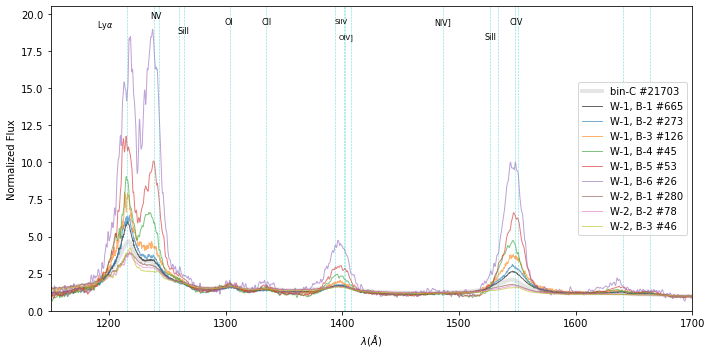

In [17]:
#ploting med spec
c = ['black', 'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C8', 'C9', 'cyan']
dir = 'outData/'
# -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)
for ii in [3]:
    c_ind=-1
    if(ii==0): lambda_min = 1000; lambda_max = 1980
    if(ii==1): lambda_min = 1150; lambda_max = 1980
    if(ii==2): lambda_min = 1150; lambda_max = 2850
    if(ii==3): lambda_min = 1150; lambda_max = 1700
    fig = plt.figure(figsize=(11.5,5.6))
    ymax=20.5
    ymin=0.02*ymax
    fs=8
    fs1=7
    y_median = 0.95*ymax
    med_step=.8
    legend_loc=7
    plt.xlim(lambda_min,lambda_max)
    plt.ylim(ymin, ymax)
    x_median=lambda_min+200
    # Bin C med Spec
    medSpec=np.loadtxt(dir+ 'central-bin-medspec.txt')
    ind = (wgrid>lambda_min) & (wgrid<lambda_max)
    plt.plot(wgrid[ind],  medSpec[ind], lw = 4, c='grey', 
                     label='bin-C #%d' %(tip_pop), alpha=0.2)
    for wdg in [0,2]:
    # for wdg in [4]:
        bin_label = np.loadtxt(dir + 'bin_label-wdg-%1d' %(wdg)+'.txt')
        bin_pop = np.loadtxt(dir + 'bin_pop-wdg-%1d' %(wdg) +'.txt')
        tip_label = np.loadtxt(dir + 'CentralBinLabel.txt' )
        tip_pop= np.sum(tip_label)
        from line_db import line_db
        from matplotlib import cm
        from scipy import ndimage

   
        

        

        
        for b in range(2,nBin+1):
    #     for b in range(len(bin_pop)):
            if(bin_pop[b-1]>=5):   
                print('bin:', b, lambda_min, 'to', lambda_max)
                medSpec=np.loadtxt(dir+ 'med-spec-wdg-%1d-bin-%1d.txt' %(wdg, b-1))
                plt.ylabel('Normalized Flux')
                plt.xlabel(r'$\lambda  (\AA)$')


                if(bin_pop[b-1]<100):
                    SmoothedMedSpec = ndimage.filters.gaussian_filter1d(medSpec,2.0)
                else:
                    SmoothedMedSpec = medSpec

                # masking for plot ranges
                
                if(wdg==0):
                    wdgl=1
                else:
                    wdgl=wdg
                c_ind+=1
                print(c_ind)
                plt.plot(wgrid[ind],  SmoothedMedSpec[ind], lw = 1., c=c[c_ind], 
                             label='W-%d, B-%d #%d' %(wdgl, b-1, bin_pop[b-1]), alpha=0.6)

    



    plt.legend(loc=7)
#     plt.title('Wedge: %d' %wdg)
    line_db( ymax, fs, fs1, ii) 
    fig_path = dir + 'med-spec-%d-%d.png'%(lambda_min, lambda_max)

    plt.savefig(fig_path, format='png', dpi=200, bbox_inches='tight')
    plt.show()

In [ ]:
#  PLotting  all bin-5  for wedges clos to erq wedge

tip_label = np.loadtxt(dir + '/tip_label_bw-%.2f' %(bw))
tip_pop= np.sum(tip_label)
from line_db import line_db
from matplotlib import cm
from scipy import ndimage
c=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
ymax=20.5
ymin=0.02*ymax
fs=8
fs1=7
y_median = 0.95*ymax
med_step=.8
legend_loc=7
   # -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)
nBin=7
for ii in range(4):
    ci=-1
    if(ii==0): lambda_min = 1000; lambda_max = 1980
    if(ii==1): lambda_min = 1150; lambda_max = 1980
    if(ii==2): lambda_min = 1150; lambda_max = 2850
    if(ii==3): lambda_min = 1150; lambda_max = 1700
    fig = plt.figure(figsize=(11.5,5.6))

    plt.xlim(lambda_min,lambda_max)
    plt.ylim(ymin, ymax)
    x_median=lambda_min+200
    for wdg in [0,1,3,4]:
        bin_label = np.loadtxt(dir + '/bin_label-bw-%.2f-wdg-%1d' %(bw, wdg)+'.txt')
        bin_pop = np.loadtxt(dir + '/bin_pop-bw-%.2f-wdg-%1d' %(bw, wdg) +'.txt')

        

        for b in range(5,6):
    #     for b in range(len(bin_pop)):
            if(bin_pop[b-1]>=4):   
                ci+=1
                print('bin:', b, lambda_min, 'to', lambda_max)
                medSpec=np.loadtxt(dir+ '/med-spec-bw-%.2f-wdg-%1d-bin-%1d.txt' %(bw, wdg, b))
               

                if(bin_pop[b-1]<100):
                    SmoothedMedSpec = ndimage.filters.gaussian_filter1d(medSpec,2.0)
                
                # masking for plot ranges
                ind = (wgrid>lambda_min) & (wgrid<lambda_max)
                plt.plot(wgrid[ind],  SmoothedMedSpec[ind], lw = .5, c=c[ci], 
                             label='wdg-%d, bin-%d #%d' %(wdg, b,  bin_pop[b-1]))
                

    plt.legend(loc=7)
    plt.ylabel('Normalized Flux')
    plt.xlabel(r'$\lambda  (\AA)$')

    line_db(ymax, fs, fs1, ii) 
    fig_path = dir + '/med-spec-%d-%d-wdg-out-bin-5.png'%(lambda_min, lambda_max)

    plt.savefig(fig_path, format='png', dpi=800, bbox_inches='tight')
    plt.show()


In [ ]:
#  PLotting  all bin-6  for wedges clos to erq wedge

tip_label = np.loadtxt(dir + '/tip_label_bw-%.2f' %(bw))
tip_pop= np.sum(tip_label)
from line_db import line_db
from matplotlib import cm
from scipy import ndimage
c=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
ymax=20.5
ymin=0.02*ymax
fs=8
fs1=7
y_median = 0.95*ymax
med_step=.8
legend_loc=7
   # -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)
nBin=7
for ii in range(4):
    ci=-1
    if(ii==0): lambda_min = 1000; lambda_max = 1980
    if(ii==1): lambda_min = 1150; lambda_max = 1980
    if(ii==2): lambda_min = 1150; lambda_max = 2850
    if(ii==3): lambda_min = 1150; lambda_max = 1700
    fig = plt.figure(figsize=(11.5,5.6))

    plt.xlim(lambda_min,lambda_max)
    plt.ylim(ymin, ymax)
    x_median=lambda_min+200
    for wdg in [0,1,3,4]:
        bin_label = np.loadtxt(dir + '/bin_label-bw-%.2f-wdg-%1d' %(bw, wdg)+'.txt')
        bin_pop = np.loadtxt(dir + '/bin_pop-bw-%.2f-wdg-%1d' %(bw, wdg) +'.txt')

        

        for b in range(6,nBin):
    #     for b in range(len(bin_pop)):
            if(bin_pop[b-1]>=4):   
                ci+=1
                print('bin:', b, lambda_min, 'to', lambda_max)
                medSpec=np.loadtxt(dir+ '/med-spec-bw-%.2f-wdg-%1d-bin-%1d.txt' %(bw, wdg, b))
               

                if(bin_pop[b-1]<100):
                    SmoothedMedSpec = ndimage.filters.gaussian_filter1d(medSpec,2.0)
                
                # masking for plot ranges
                ind = (wgrid>lambda_min) & (wgrid<lambda_max)
                plt.plot(wgrid[ind],  SmoothedMedSpec[ind], lw = .5, c=c[ci], 
                             label='wdg-%d, bin-%d #%d' %(wdg, b,  bin_pop[b-1]))
                

    plt.legend(loc=7)
    plt.ylabel('Normalized Flux')
    plt.xlabel(r'$\lambda  (\AA)$')

    line_db(ymax, fs, fs1, ii) 
    fig_path = dir + '/med-spec-%d-%d-wdg-out-bin-6.png'%(lambda_min, lambda_max)

    plt.savefig(fig_path, format='png', dpi=800, bbox_inches='tight')
    plt.show()


In [ ]:
#  PLotting  all bin-7  for wedges clos to erq wedge

tip_label = np.loadtxt(dir + '/tip_label_bw-%.2f' %(bw))
tip_pop= np.sum(tip_label)
from line_db import line_db
from matplotlib import cm
from scipy import ndimage
c=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
ymax=20.5
ymin=0.02*ymax
fs=8
fs1=7
y_median = 0.95*ymax
med_step=.8
legend_loc=7
   # -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)
nBin=7
for ii in range(4):
    ci=-1
    if(ii==0): lambda_min = 1000; lambda_max = 1980
    if(ii==1): lambda_min = 1150; lambda_max = 1980
    if(ii==2): lambda_min = 1150; lambda_max = 2850
    if(ii==3): lambda_min = 1150; lambda_max = 1700
    fig = plt.figure(figsize=(11.5,5.6))

    plt.xlim(lambda_min,lambda_max)
    plt.ylim(ymin, ymax)
    x_median=lambda_min+200
    for wdg in [0,1,3,4]:
        bin_label = np.loadtxt(dir + '/bin_label-bw-%.2f-wdg-%1d' %(bw, wdg)+'.txt')
        bin_pop = np.loadtxt(dir + '/bin_pop-bw-%.2f-wdg-%1d' %(bw, wdg) +'.txt')

        

        for b in range(nBin, nBin+1):
    #     for b in range(len(bin_pop)):
            if(bin_pop[b-1]>=4):   
                ci+=1
                print('bin:', b, lambda_min, 'to', lambda_max)
                medSpec=np.loadtxt(dir+ '/med-spec-bw-%.2f-wdg-%1d-bin-%1d.txt' %(bw, wdg, b))
               

                if(bin_pop[b-1]<100):
                    SmoothedMedSpec = ndimage.filters.gaussian_filter1d(medSpec,2.0)
                
                # masking for plot ranges
                ind = (wgrid>lambda_min) & (wgrid<lambda_max)
                plt.plot(wgrid[ind],  SmoothedMedSpec[ind], lw = .5, c=c[ci], 
                             label='wdg-%d, bin-%d #%d' %(wdg, b,  bin_pop[b-1]))
                

    plt.legend(loc=7)
    plt.ylabel('Normalized Flux')
    plt.xlabel(r'$\lambda  (\AA)$')

    line_db(ymax, fs, fs1, ii) 
    fig_path = dir + '/med-spec-%d-%d-wdg-out-bin-7.png'%(lambda_min, lambda_max)

    plt.savefig(fig_path, format='png', dpi=800, bbox_inches='tight')
    plt.show()


In [ ]:
#  PLotting  wedge 0 and 2 in one plot 

tip_label = np.loadtxt(dir + '/tip_label_bw-%.2f' %(bw))
tip_pop= np.sum(tip_label)
from line_db import line_db
from matplotlib import cm
from scipy import ndimage
c=['gray', 'red', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'black']
ymax=20.5
ymin=0.02*ymax
fs=14
fs1=fs
y_median = 0.95*ymax
med_step=.8
legend_loc=7
   # -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)
nBin=7
for ii in range(4):
    ci=-1
    if(ii==0): lambda_min = 1000; lambda_max = 1980
    if(ii==1): lambda_min = 1150; lambda_max = 1980
    if(ii==2): lambda_min = 1150; lambda_max = 2850
    if(ii==3): lambda_min = 1150; lambda_max = 1700
    fig = plt.figure(figsize=(11.5,5.6))
    # masking for plot ranges
    ind = (wgrid>lambda_min) & (wgrid<lambda_max)
    plt.xlim(lambda_min,lambda_max)
    plt.ylim(ymin, ymax)
    x_median=lambda_min+200
    for wdg in [0,2]:
        bin_label = np.loadtxt(dir + '/bin_label-bw-%.2f-wdg-%1d' %(bw, wdg)+'.txt')
        bin_pop = np.loadtxt(dir + '/bin_pop-bw-%.2f-wdg-%1d' %(bw, wdg) +'.txt')
        
        for b in range(1,nBin+1):
            
            print('bin:', b, lambda_min, 'to', lambda_max)
            medSpec=np.loadtxt(dir+ '/med-spec-bw-%.2f-wdg-%1d-bin-%1d.txt' %(bw, wdg, b))
            if(b>1):
                if(bin_pop[b-1]>=5):
                    ci+=1
                    if(bin_pop[b-1]<100):
                        SmoothedMedSpec = ndimage.filters.gaussian_filter1d(medSpec,2.0)
                        
                    else:
                        SmoothedMedSpec=medSpec
                        
                    plt.plot(wgrid[ind],  SmoothedMedSpec[ind], lw = .5, c=c[ci], 
                                 label='wdg-%d, bin-%d #%d' %(wdg, b,  bin_pop[b-1]))
            else:
                if(wdg==0):
                    plt.plot(wgrid[ind],  medSpec[ind], lw =2, c='gray', 
                                     label='wdg-%d, bin-%d #%d' %(wdg, b,  tip_pop))

            
    # plt.legend(loc=7)
    plt.ylabel('Normalized Flux', fontsize=fs)
    plt.xlabel(r'$\lambda  (\AA)$', fontsize=fs)
    line_db(ymax, fs, fs1, ii) 
    fig_path = dir + '/med-spec-%d-%d-wdg-0+2.png'%(lambda_min, lambda_max)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)

    plt.savefig(fig_path, format='png', dpi=800, bbox_inches='tight')
    plt.show()


In [ ]:
dir


In [ ]:
#  PLotting  wedge 0 and 2 in one plot 

tip_label = np.loadtxt(dir + '/tip_label_bw-%.2f' %(bw))
tip_pop= np.sum(tip_label)
from line_db import line_db
from matplotlib import cm
from scipy import ndimage
c=['red', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'black']
ymax=11.2
ymin=0.02*ymax
fs=8
fs1=7
y_median = 0.95*ymax
med_step=.8
legend_loc=7
   # -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)
nBin=7
for ii in range(4):
    ci=-1
    if(ii==0): lambda_min = 1470; lambda_max = 1600
#     if(ii==1): lambda_min = 1150; lambda_max = 1980
#     if(ii==2): lambda_min = 1150; lambda_max = 2850
#     if(ii==3): lambda_min = 1150; lambda_max = 1700
    fig = plt.figure(figsize=(11.5,5.6))
    # masking for plot ranges
    ind = (wgrid>lambda_min) & (wgrid<lambda_max)
    plt.xlim(lambda_min,lambda_max)
    plt.ylim(ymin, ymax)
    x_median=lambda_min+200
    for wdg in [0]:
        bin_label = np.loadtxt(dir + '/bin_label-bw-%.2f-wdg-%1d' %(bw, wdg)+'.txt')
        bin_pop = np.loadtxt(dir + '/bin_pop-bw-%.2f-wdg-%1d' %(bw, wdg) +'.txt')
        
        for b in [1,nBin]:
            
            print('bin:', b, lambda_min, 'to', lambda_max)
            medSpec=np.loadtxt(dir+ '/med-spec-bw-%.2f-wdg-%1d-bin-%1d.txt' %(bw, wdg, b))
            if(b>1):
                if(bin_pop[b-1]>=5):
                    ci+=1
                    if(bin_pop[b-1]<100):
                        SmoothedMedSpec = ndimage.filters.gaussian_filter1d(medSpec,2.0)
                        
                    else:
                        SmoothedMedSpec=medSpec
                        
                    plt.plot(wgrid[ind],  SmoothedMedSpec[ind], lw = 2, c=c[ci], 
                                 label='ERQs')
#             else:
#                 if(wdg==0):
#                     plt.plot(wgrid[ind],  medSpec[ind], lw =2, c='gray', 
#                                      label='Typical QSO')

            
    plt.legend(loc=7)
    plt.ylabel('Normalized Flux')
    plt.xlabel(r'$\lambda  (\AA)$')

#     line_db(ymax, fs, fs1, ii) 
    fig_path = dir + '/c4.png'

    plt.savefig(fig_path, format='png', dpi=800, bbox_inches='tight')
    plt.show()


In [ ]:
# making a table for properties of all wedgs/bins
wedge=[]
Bin=[]
Pop=[]
iw3=[]
rew=[]
fwhm=[]
frat=[]
iz=[]
Lum=[]
kt80=[]
for wdg in [0,1,2,3,4, 10, 20, 100, 200]:
    phys = Table.read(dir+'/wdg-%d-Properties.fits' %wdg)
    for b in range(0,nBin):
        wedge.append(wdg)
        Bin.append(b+1)
        Pop.append(phys['nBin'][b])
        iw3.append(phys['iw3'][b])
        rew.append(phys['rew'][b])
        fwhm.append(phys['fwhm'][b])
        frat.append(phys['frat'][b])
        iz.append(phys['iz'][b])
        Lum.append(phys['Lum'][b])
        kt80.append(phys['kt80'][b])
        
TabAll =Table([np.array(wedge, dtype=np.int16), np.array(nBin, dtype=np.int16)] , #iw3, rew, fwhm, kt80, frat, iz, Lum],
         names=['wedge', 'nBin']) #, 'iw3', 'rew', 'fwhm', 'kt80', 'frat', 'iz', 'Lum'))

# TabAll.write('TabAll.fits', format='fits')

In [ ]:
phys = np.array(list(zip(wedge, Bin, Pop, iw3, rew, kt80, fwhm, frat, iz, Lum)))

In [ ]:
np.array(Pop, dtype=np.int16)
